In [2]:
import os

import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

from pyuvdata import UVData
from pyuvdata.data import DATA_PATH


In [63]:
uvd = UVData()
uvd.read_uvfits(
    os.path.join(DATA_PATH, "fewant_randsrc_airybeam_Nsrc100_10MHz.uvfits")
)
uvd_orig = uvd.copy()

In [64]:
# uvw_array is now equivalent to baseline positions
uvd.select(times=uvd.time_array[0])

uvd.unphase_to_drift(use_ant_pos=True)
uvd.conjugate_bls(convention="ant1<ant2", use_enu=True)


In [5]:
bl_positions = uvd.uvw_array


In [6]:
bl_positions.shape

(66, 3)

In [31]:
dist_matrix_vec = pdist(bl_positions)

In [32]:
dist_matrix_vec.shape

(2145,)

In [33]:
(66*65)/2

2145.0

In [34]:
dist_matrix = squareform(dist_matrix_vec)

In [35]:
dist_matrix.shape

(66, 66)

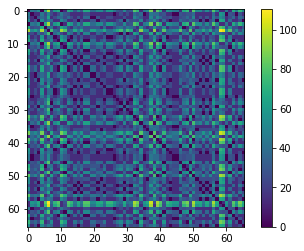

In [36]:
plt.imshow(dist_matrix)
plt.colorbar()

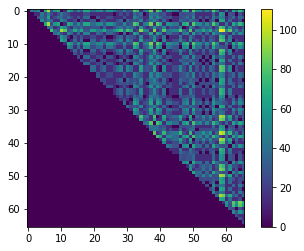

In [37]:
plt.imshow(np.triu(dist_matrix))
plt.colorbar()

In [41]:
n_bls = bl_positions.shape[0]
dist_matrix_triu = np.zeros([n_bls, n_bls])
dist_matrix_triu[np.triu_indices(n_bls, k = 1)] = dist_matrix_vec

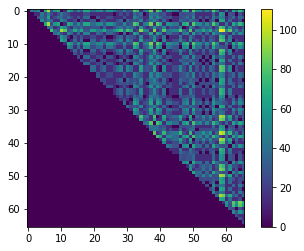

In [42]:
plt.imshow(dist_matrix_triu)
plt.colorbar()

In [43]:
print(np.max(np.abs(dist_matrix_triu-np.triu(dist_matrix))))

0.0


In [44]:
tol = 0.05

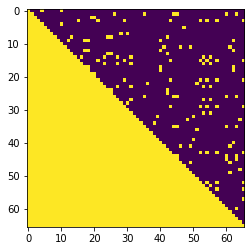

In [46]:
plt.imshow(dist_matrix_triu < tol)
# plt.colorbar()

In [53]:
adj = {}  # Adjacency dictionary
for bi, col in enumerate(dist_matrix_triu < tol):
    print(bi, col)
    col[bi] = True
    adj[uvd.baseline_array[bi]] = uvd.baseline_array[col]


0 [ True False False False  True False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]
1 [ True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False  True
 False False False False False False False False  True  True False False
 False False False False False False False False False False False False
  True False False  True False False]
2 [ True  True  True False False False False False False False False False
 False False False False False False False  True  True False False False
 False False False False False False False

In [54]:
adj

{71692: array([71692, 96281, 94232]),
 96284: array([71692, 96284, 90137, 94235, 67597, 71695, 69646, 92186]),
 67609: array([71692, 96284, 67609, 69658, 71707]),
 94223: array([ 71692,  96284,  67609,  94223,  92174,  69635,  67586, 120860,
        116762, 114713,  90125, 118811]),
 96281: array([71692, 96284, 67609, 94223, 96281, 94232]),
 69660: array([71692, 96284, 67609, 94223, 96281, 69660, 67611]),
 114716: array([ 71692,  96284,  67609,  94223,  96281,  69660, 114716]),
 71706: array([ 71692,  96284,  67609,  94223,  96281,  69660, 114716,  71706,
         69657,  67608]),
 92187: array([ 71692,  96284,  67609,  94223,  96281,  69660, 114716,  71706,
         92187,  69647,  90138,  67598,  94236]),
 114714: array([ 71692,  96284,  67609,  94223,  96281,  69660, 114716,  71706,
         92187, 114714,  90126,  92175, 118812, 116763,  67587]),
 94232: array([ 71692,  96284,  67609,  94223,  96281,  69660, 114716,  71706,
         92187, 114714,  94232]),
 92184: array([ 71692,  

In [70]:
times = np.unique(uvd_orig.time_array)[:, np.newaxis]
time_dist_matrix_vec = pdist(times)

In [71]:
time_dist_matrix_vec.shape

(6,)

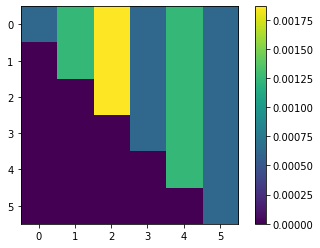

In [72]:
plt.imshow(np.triu(time_dist_matrix_vec))
plt.colorbar()

In [74]:
times.ndim

2

In [77]:
np.all([False, False, False])

False